# || The Sparks Foundation || GRIPDEC20 DSBA Task 6

# Author: Meenakshi Vashistha

### Create the Decision Tree classifier and visualize it graphically. The purpose is if we feed any new data to this classifier, it would be able to predict the right class accordingly.

#### importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt

#### importing data

In [2]:
data=pd.read_csv("Iris.csv")
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


### Checking Data

In [3]:
data.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

### Dropping given ID feature

In [4]:
data=data.drop(["Id"], axis=1)

In [5]:
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### Split Dependent and Independent

In [6]:
X=data.drop(["Species"], axis=1)
Y=data[["Species"]]

#### Missing Value Check

In [7]:
X.isnull().mean()

SepalLengthCm    0.0
SepalWidthCm     0.0
PetalLengthCm    0.0
PetalWidthCm     0.0
dtype: float64

In [8]:
Y.isnull().mean()

Species    0.0
dtype: float64

#### Woww !!! No missing values in DATA !

### Creating different dataframes for numeric and categorical features

In [9]:
# Create a dataframe for numeric features
num=X.select_dtypes(include='number')

# No categorical feature in X

In [10]:
num.describe(percentiles=[0.01,0.1,0.15,0.2,0.25,0.5,0.75,0.9,0.95,0.99])

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
1%,4.400000,2.200000,1.149000,0.100000
10%,4.800000,2.500000,1.400000,0.200000
15%,5.000000,2.600000,1.435000,0.200000
20%,5.000000,2.700000,1.500000,0.200000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000


### Removal of Extreme Values and Outliers from the numerical features

In [11]:
def outlier_cap(x):
    x=x.clip(upper=x.quantile(0.99))
    x=x.clip(lower=x.quantile(0.01))
    return(x)

In [12]:
X=X.apply(lambda x : outlier_cap(x))
X.describe(percentiles=[0.01,0.1,0.15,0.2,0.25,0.5,0.75,0.9,0.95,0.99])

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.842667,3.053347,3.758653,1.198667
std,0.823672,0.424997,1.760089,0.763161
min,4.400000,2.200000,1.149000,0.100000
1%,4.400000,2.200000,1.173990,0.100000
10%,4.800000,2.500000,1.400000,0.200000
15%,5.000000,2.600000,1.435000,0.200000
20%,5.000000,2.700000,1.500000,0.200000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000


### Removing numerical Features with 0 variance 

In [13]:
from sklearn.feature_selection import VarianceThreshold
varcutoff=VarianceThreshold()
X=pd.DataFrame(varcutoff.fit_transform(X),index=X.index,columns=X.columns)
X.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.842667,3.053347,3.758653,1.198667
std,0.823672,0.424997,1.760089,0.763161
min,4.400000,2.200000,1.149000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.700000,4.151000,6.700000,2.500000


In [14]:
# Above code result indicates that there is not any feature with 0 variance in data

### Encoding Target categorical variable

In [15]:
Y  # Target variable

,Species
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa
...,...
145,Iris-virginica
146,Iris-virginica
147,Iris-virginica
148,Iris-virginica


In [16]:
# Unique values in a Species column
Y.Species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

#### We can now generate a label encoding scheme for mapping each category to a numeric value by leveraging scikit-learn

In [17]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
encode_labels = enc.fit_transform(Y['Species'])
encode_mappings = {index: label for index, label in enumerate(enc.classes_)}
encode_mappings


{0: 'Iris-setosa', 1: 'Iris-versicolor', 2: 'Iris-virginica'}

In [18]:
Y['Species_labels'] = encode_labels

<ipython-input-18-1149e111fc9e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Y['Species_labels'] = encode_labels


In [19]:
Y  # {0: 'Iris-setosa', 1: 'Iris-versicolor', 2: 'Iris-virginica'}

,Species,Species_labels
0,Iris-setosa,0
1,Iris-setosa,0
2,Iris-setosa,0
3,Iris-setosa,0
4,Iris-setosa,0
...,...,...
145,Iris-virginica,2
146,Iris-virginica,2
147,Iris-virginica,2
148,Iris-virginica,2


In [20]:
# Dropping Species column from Y, will work with "Species_labels"
Y=Y.drop(["Species"], axis=1)

In [21]:
Y.head()

,Species_labels
0,0
1,0
2,0
3,0
4,0


### Train Test split

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =  train_test_split(X,Y, test_size=0.3,random_state=42)

### Check for randomness of train and test by testing the event rates across the two datasets

In [23]:
y_train.mean()

Species_labels    1.057143
dtype: float64

In [24]:
y_test.mean()

Species_labels    0.866667
dtype: float64

### Building the Decision Tree Model

In [25]:
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier(random_state=0,max_depth=5)
clf.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5, random_state=0)

### Making class predictions

In [26]:
y_pred=clf.predict(X_test)

In [27]:
y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0])

### Model Evaluation

In [28]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision",metrics.precision_score(y_test,y_pred, average=None))
print("Recall",metrics.recall_score(y_test,y_pred, average=None))
print("f1_score:", metrics.f1_score(y_test, y_pred, average=None))

Accuracy: 1.0
Precision [1. 1. 1.]
Recall [1. 1. 1.]
f1_score: [1. 1. 1.]


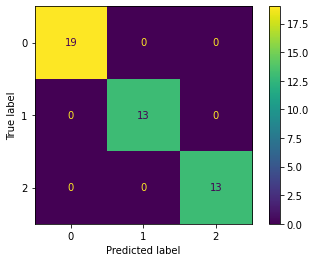

In [29]:
metrics.plot_confusion_matrix(clf,X_test, y_test)

In [30]:
data_1=pd.concat([X,Y],axis=1,join='inner')
data_1.shape

(150, 5)

In [31]:
data_1

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species_labels
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [39]:
y_pred_prob = clf.predict_proba(X)[:, 1]
data_1['y_pred_P']=pd.DataFrame(y_pred_prob)
data_1['P_Rank_RF']=pd.qcut(data_1['y_pred_P'].rank(method='first').values,10,duplicates='drop').codes+1
rank_df=data_1.groupby('P_Rank_RF')['Species_labels'].agg(['count','mean'])
rank_df=pd.DataFrame(rank_df)
sorted_rank_df=rank_df.sort_values(by='P_Rank_RF',ascending=False)
sorted_rank_df['N_events']=rank_df['count']*rank_df['mean']
sorted_rank_df['cum_events']=sorted_rank_df['N_events'].cumsum()
sorted_rank_df['event_cap']=sorted_rank_df['N_events']/max(sorted_rank_df['N_events'].cumsum())
sorted_rank_df['cum_event_cap']=sorted_rank_df['event_cap'].cumsum()
sorted_rank_df['random_cap']=sorted_rank_df['count']/max(sorted_rank_df['count'].cumsum())
sorted_rank_df['cum_random_cap']=sorted_rank_df['random_cap'].cumsum()
sorted_reindexed=sorted_rank_df.reset_index()
sorted_reindexed['decile']=sorted_reindexed.index+1
sorted_reindexed['lift_over_random']=sorted_reindexed['cum_event_cap']/sorted_reindexed['cum_random_cap']
sorted_reindexed

,P_Rank_RF,count,mean,N_events,cum_events,event_cap,cum_event_cap,random_cap,cum_random_cap,decile,lift_over_random
0,10,15,1.000000,15.0,15.0,0.100000,0.100000,0.1,0.1,1,1.000000
1,9,15,1.000000,15.0,30.0,0.100000,0.200000,0.1,0.2,2,1.000000
2,8,15,1.000000,15.0,45.0,0.100000,0.300000,0.1,0.3,3,1.000000
3,7,15,1.666667,25.0,70.0,0.166667,0.466667,0.1,0.4,4,1.166667
4,6,15,2.000000,30.0,100.0,0.200000,0.666667,0.1,0.5,5,1.333333
5,5,15,2.000000,30.0,130.0,0.200000,0.866667,0.1,0.6,6,1.444444
6,4,15,1.333333,20.0,150.0,0.133333,1.000000,0.1,0.7,7,1.428571
7,3,15,0.000000,0.0,150.0,0.000000,1.000000,0.1,0.8,8,1.250000
8,2,15,0.000000,0.0,150.0,0.000000,1.000000,0.1,0.9,9,1.111111
9,1,15,0.000000,0.0,150.0,0.000000,1.000000,0.1,1.0,10,1.000000


#### Gains Chart

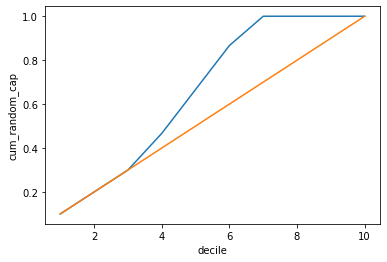

In [41]:
ax = sns.lineplot( x="decile", y="cum_event_cap", data=sorted_reindexed)
ax = sns.lineplot( x="decile", y="cum_random_cap", data=sorted_reindexed)

#### Lift curve

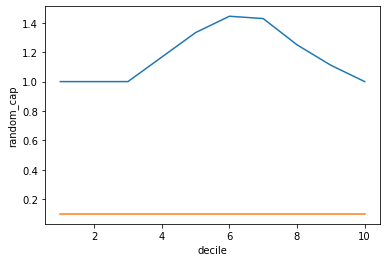

In [40]:
ax = sns.lineplot( x="decile", y="lift_over_random", data=sorted_reindexed)
ax = sns.lineplot( x="decile", y="random_cap", data=sorted_reindexed)

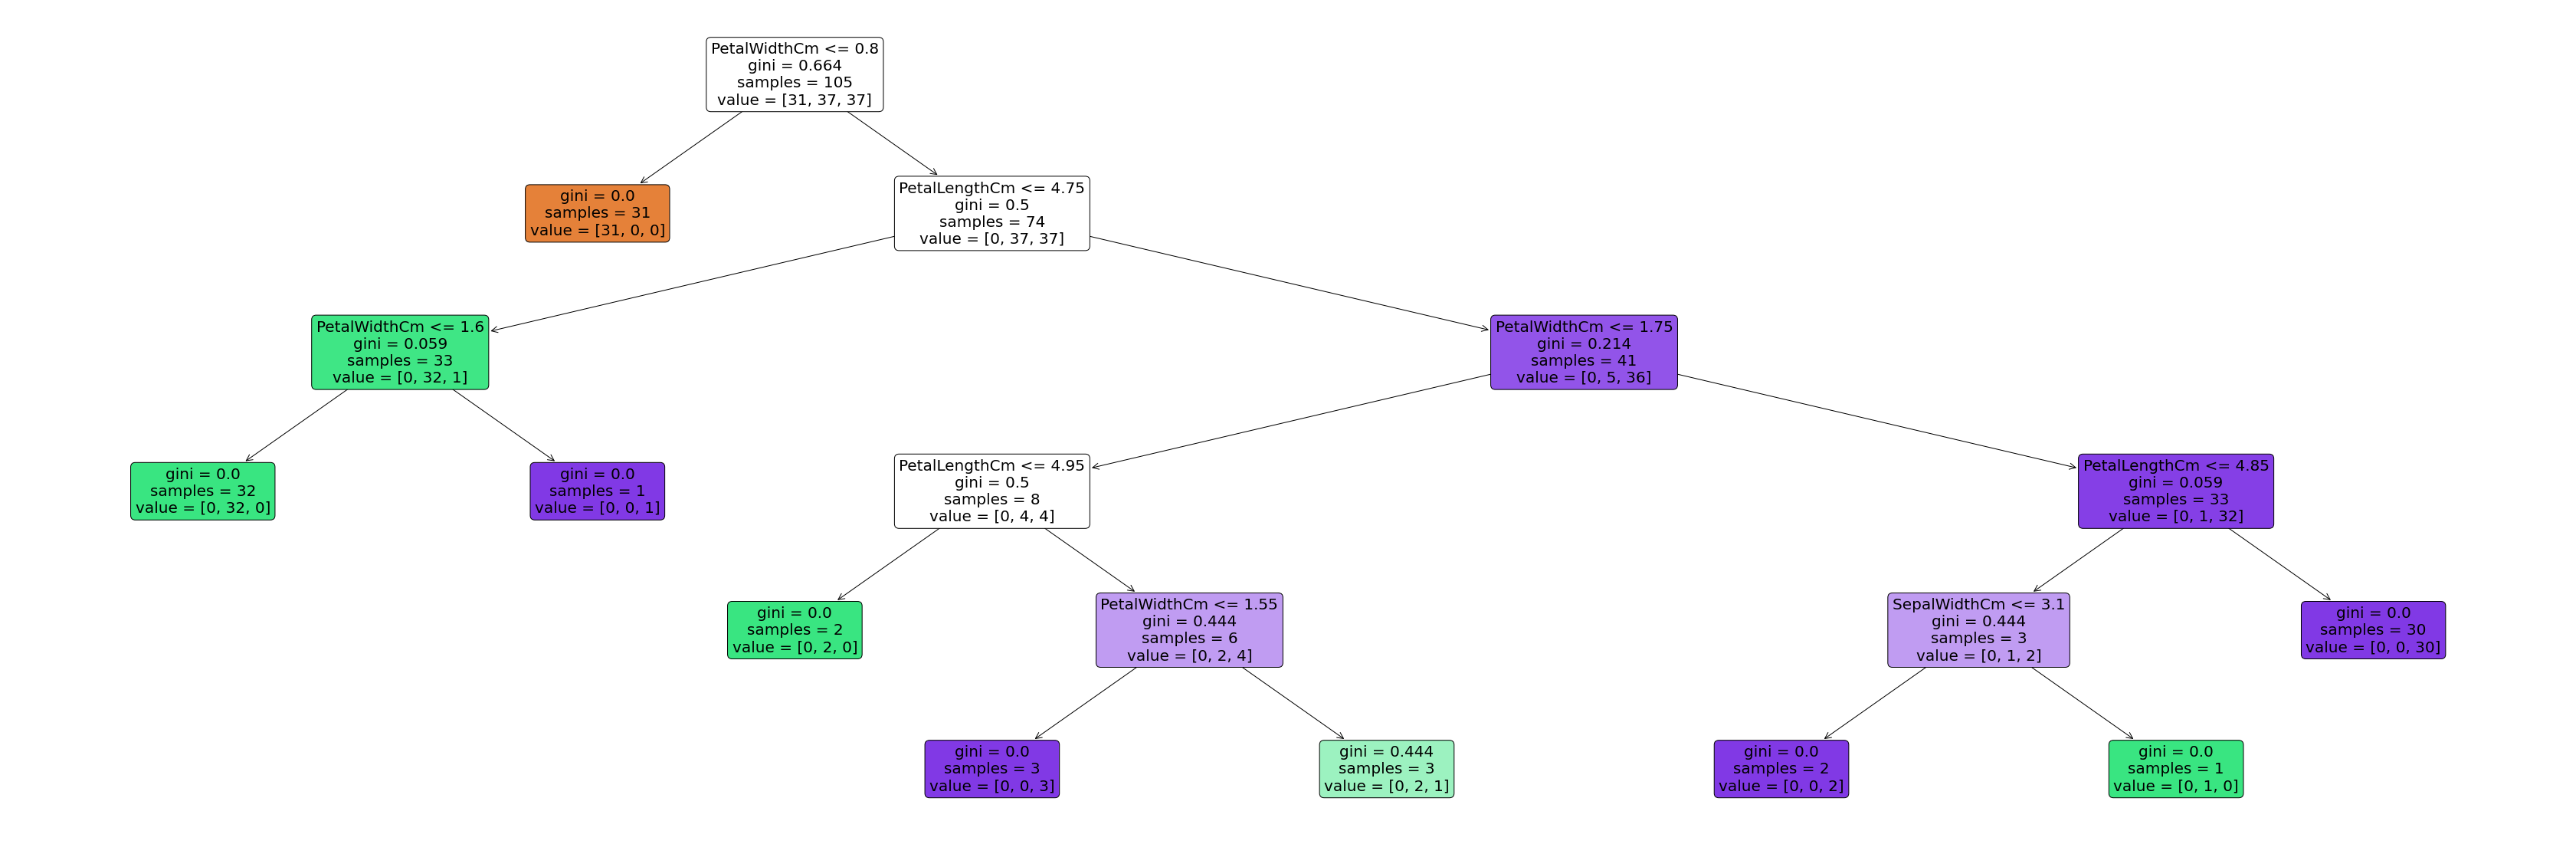

In [42]:
from sklearn import tree
import pydotplus
import matplotlib.pyplot as plt
plt.figure(figsize=[60,20])  # create space for figure
tree.plot_tree(clf,filled=True,fontsize=20,rounded=True,feature_names=X.columns)
plt.show()